<h1 style="color: white; background-color: #3498db; font-family: 'Arial', sans-serif; text-align: center; padding: 10px; border-radius: 8px;">Sales Analysis Using Linear Regression</h1>


# Importing the neccessary libraries

In [3]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [4]:
df=pd.read_csv(r'D:\Github\Kaggle\datasets\advertising.csv')

# Data Exploration

### Data Description

- **TV:** This column represents the amount of money spent on advertising through TV channels. It indicates the financial investment in television advertising for each instance.

- **Radio:** This column represents the advertising expenditure on radio. It shows how much money is allocated to radio advertising for each case.

- **Newspaper:** This column represents the advertising expenditure in newspapers. It indicates the financial investment in newspaper advertising for each instance.

- **Sales:** This column represents the sales generated as a result of the advertising expenditures in TV, Radio, and Newspaper. It shows the outcome variable that is being analyzed or predicted.

The dataset contains information about advertising expenditures across different channels (TV, Radio, Newspaper) and the corresponding sales outcomes. The goal is to analyze the relationship between advertising spending and sales, potentially building a predictive model or understanding which advertising channels contribute more to sales.

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
print(f"The shape of the data is: {df.shape}")
print(f"The size of the data is: {df.size}")

The shape of the data is: (200, 4)
The size of the data is: 800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
if df.duplicated().sum() > 0:
    print(f"There are {df.duplicated().sum()} duplicated rows in the dataset.")
else:
    print("There are no duplicated rows in the dataset.")

There are no duplicated rows in the dataset.


In [10]:
if df.isnull().sum().any():
    print(f"There are {df.isnull().sum().sum()} null values in the dataset.")
else:
    print("There are no null values in the dataset.")

There are no null values in the dataset.


<Axes: >

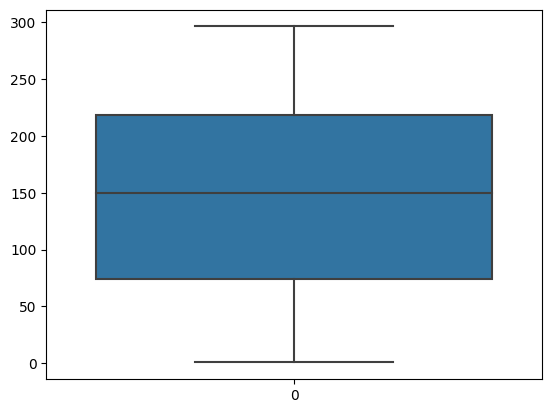

In [11]:
# To check the data distribution of the feature TV
sns.boxplot(df["TV"])

# Fitting Regression Model to the data

In [12]:
x_all=df.iloc[:,0:3]
x=df.iloc[:,[0]]
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.size,x_test.size

(140, 60)

In [14]:
from sklearn.linear_model import LinearRegression

# Assuming x_train is a pandas Series and y_train is a pandas Series
x_train_reshaped = x_train.values
y_train_reshaped = y_train.values  # No need to reshape y_train as it's the target variable

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train_reshaped, y_train_reshaped)

LinearRegression()

In [15]:
x_test_reshaped=x_test.values.reshape(-1,1)
y_pred=model.predict(x_test_reshaped)
residual=y_test-y_pred

Linear regression, a statistical method for modeling the relationship between a dependent variable and one or more independent variables, relies on several key assumptions. These assumptions are crucial for ensuring the validity and reliability of the model's results.

# 1) Linearity

> This assumption states that the relationship between the dependent variable and the independent variables is linear. In simpler terms, the change in the dependent variable should be proportional to the change in the independent variable(s). This can be visualized as a straight line in a scatter plot of the data.

c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


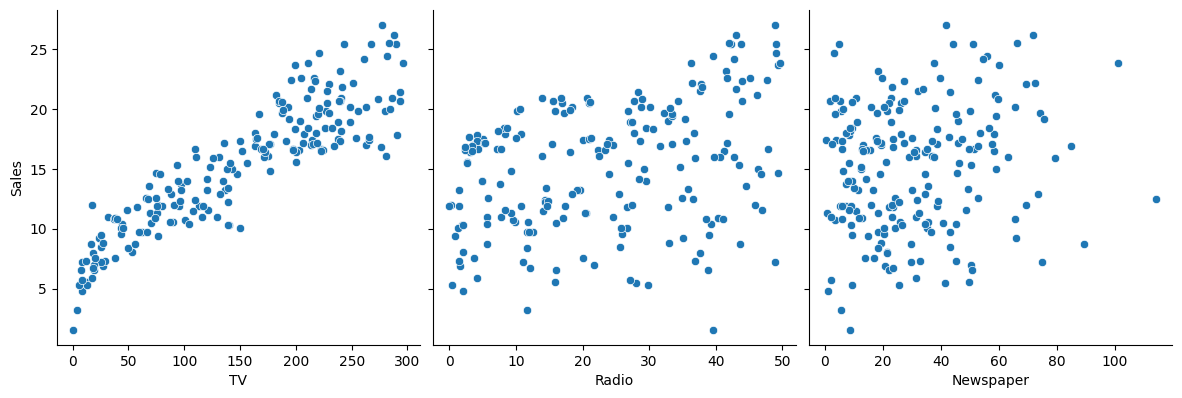

In [16]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
                               height=3,size=4, aspect=1, kind='scatter', markers='o')

From tha above analysis we can see that advertising expenditure spent on TV has linear relationship with sales, hence we can proceed with the linear regression.

# 2) Multicollinearity

> This assumption states that the independent variables are not highly correlated with each other. Multicollinearity occurs when there is a strong linear relationship between two or more independent variables. This can lead to unreliable estimates of the coefficients and make it difficult to interpret the results of the regression analysis.

### Methods to detect the multicollinearity

**i) Variance Inflation Factor (VIF)** is a measure that quantifies the extent of multicollinearity in a set of independent variables within a regression model.

**Interpretation:**

A VIF of 1 indicates no multicollinearity.
VIF greater than 1 suggests the presence of multicollinearity.
Generally, a VIF above 5 or 10 is considered high, indicating a problematic level of multicollinearity.



In [17]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
vif=[]
for i in range (x_all.shape[1]):
    vif.append(variance_inflation_factor(x_all,i))

In [19]:
pd.DataFrame({'vif':vif},index=df.columns[0:3]).T

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


* The VIF values are all below 5, which indicates moderate multicollinearity.
Generally, VIF values around 3 or 4 might raise some concern, but they are not excessively high.

* While these VIF values suggest some level of multicollinearity, they may not be severe enough to cause significant issues with interpretation.

**ii) Correlation Heatmap**

> The correlation heatmap is a useful tool for assessing multicollinearity among predictor variables in a dataset. In a correlation heatmap:

* Darker colors (towards -1 or 1) indicate stronger correlations.
* Positive values indicate a positive correlation, while negative values indicate a negative correlation.

<Axes: >

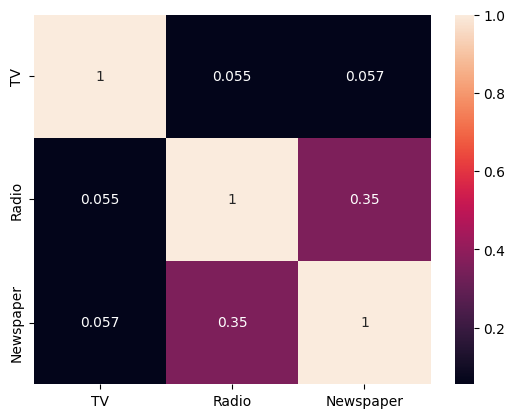

In [20]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

From the above analysis we can interpret that there is no multicollinearity between the independent features.

# 3) Normal Residual

> The residuals (the differences between the observed and predicted values) are assumed to be normally distributed.

c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


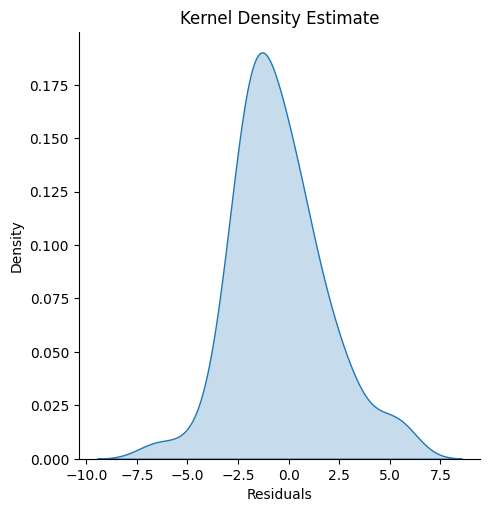

In [21]:
sns.displot(residual,kind="kde",fill=True)
plt.title("Kernel Density Estimate")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

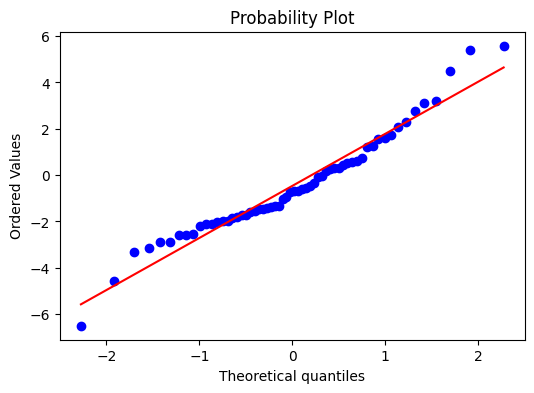

In [22]:
# QQ Plot
import scipy as sp

fig,ax =plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)

plt.show()

From the above analysis we can see that the residuals are normally distributed.

# 4) Homoskedasticity

> The variance of the errors (residuals) should be constant across all levels of the independent variable. In other words, the spread of the residuals should be roughly constant as you move along the regression line.

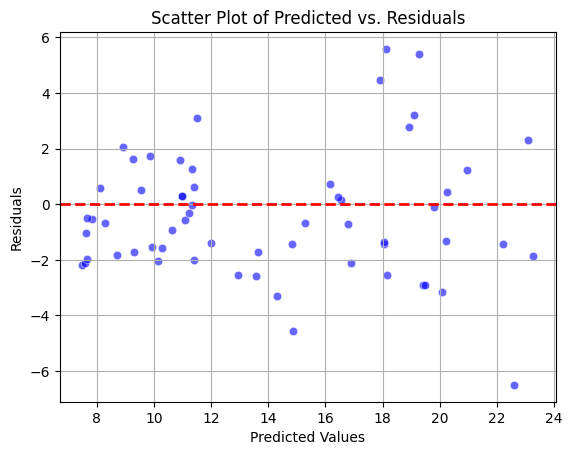

In [23]:
sns.scatterplot(x=y_pred, y=residual, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title("Scatter Plot of Predicted vs. Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)  
plt.show()

From the above scatter plot we can see that almost all residuals have constant variance.

# 5) No Autocorrelation of Error

> This assumption states that the error terms (the difference between the actual values and the predicted values) are not correlated with each other. In simpler terms, the error at one observation should not be related to the error at any other observation.



c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


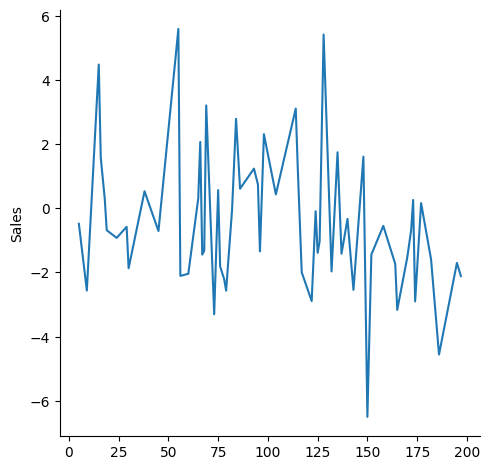

In [24]:
sns.relplot(residual,kind="line")

Since there are no repetative patterns occuring we can say that the residuals are not autocorrelated.

# Interpretation of Linear Regression Results

In [25]:
# prediction on test data
y_pred

array([16.16109107, 17.92129084, 23.26769201,  7.84812269, 19.28667945,
       11.32465432, 19.09475735,  9.94829874, 19.4018327 , 16.8081427 ,
        8.93385339, 10.28827502, 20.0653348 ,  7.50266292, 14.85602084,
       16.53945177,  7.6068492 , 18.04192759, 11.3356213 , 20.22435596,
       19.79116038, 10.92435967,  9.29028013, 20.96462689, 10.99016153,
       10.14022083, 18.91380224, 14.84505386, 11.98815642,  7.66716757,
       18.16256433, 11.00112851, 18.11321294,  8.13326408, 22.59870643,
       20.26822387,  9.85507944, 22.21486224, 13.63320293,  8.71451385,
       13.56740107, 16.91232898,  9.56993804, 10.62276781, 19.48956852,
        9.30124711, 11.07789734, 15.28373293, 12.94228339, 11.39045618,
       11.49464246, 16.44074898,  7.68361804,  7.63426664, 11.39593967,
       14.30218851, 11.23143502, 23.09222038,  8.28131827, 18.04192759])

In [26]:
print(f"The Coefficient or slope of the best fit is {model.coef_}")
print(f"The intercept of the best fit is {model.intercept_}")

The Coefficient or slope of the best fit is [0.05483488]
The intercept of the best fit is 7.206554548173251


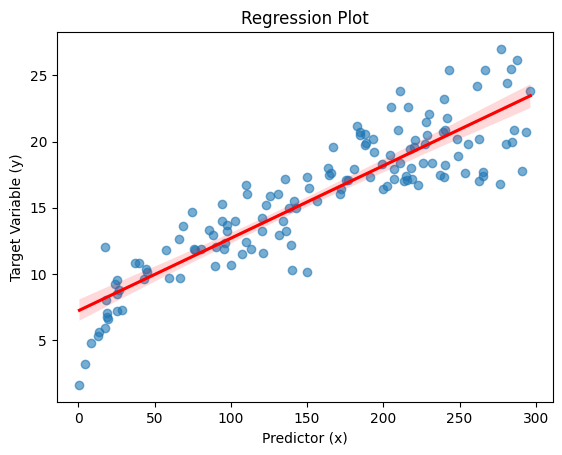

In [27]:
sns.regplot(x=x_train_reshaped, y=y_train_reshaped, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Regression Plot")
plt.xlabel("Predictor (x)")
plt.ylabel("Target Variable (y)")
plt.show()

In [28]:
# Example: Predict the sales for advertisement expenditure spent on T.V (e.g., 200)
prediction_single_value = model.predict([[200]])
print(f'Prediction for a single value (200): {prediction_single_value[0]}')

Prediction for a single value (200): 18.17353130722913


In [29]:
random_numbers = np.random.randint(100, 300, 10)  # Generating random numbers between 100 and 300

predictions_random_numbers = model.predict(np.array(random_numbers).reshape(-1, 1))
print('Predictions for 10 random numbers:\n')

for i in range(10):
    print(f'Random Number: {random_numbers[i]}, Prediction: {predictions_random_numbers[i]}')

Predictions for 10 random numbers:

Random Number: 272, Prediction: 22.121642940489245
Random Number: 113, Prediction: 13.402896417039823
Random Number: 286, Prediction: 22.88933131362316
Random Number: 197, Prediction: 18.009026655843293
Random Number: 209, Prediction: 18.667045261386644
Random Number: 197, Prediction: 18.009026655843293
Random Number: 250, Prediction: 20.915275496993097
Random Number: 276, Prediction: 22.340982475670366
Random Number: 237, Prediction: 20.20242200765447
Random Number: 187, Prediction: 17.4606778178905


# Regression Metrics

Commonly used regression performance metrics in scikit-learn include:

* Mean Absolute Error (MAE): Measures the average absolute differences between predicted and actual values.
* Mean Squared Error (MSE): Measures the average squared differences between predicted and actual values.
* Root Mean Squared Error (RMSE): The square root of the MSE; provides an interpretable scale.
* R-squared (R2): Measures the proportion of variance explained by the model.

These metrics collectively provide a comprehensive picture of how well a regression model is fitting the data, and they serve as valuable tools in the model development and evaluation process.

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [31]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(f"The Mean Squared Error obtained is : {mse}")
print(f"The Mean Absolute Error obtained is : {mae}")
print(f"The Root Mean Squared Error obtained is:{rmse}")

The Mean Squared Error obtained is : 5.179525402166653
The Mean Absolute Error obtained is : 1.8069123776641516
The Root Mean Squared Error obtained is:2.2758570698017597


In [32]:
r2score=r2_score(y_test,y_pred)
print(f"The R square value obtained is r2score: {r2score}")

The R square value obtained is r2score: 0.814855389208679


The ( R^2 ) (R-squared) value obtained for your regression model is ( R^2 0.8149 ). 

- **Interpretation:**
> The ( R^2) value measures the proportion of the variance in the dependent variable (target) that is explained by the independent variable(s) (predictor). In this case, approximately 81.49% of the variability in the target variable is accounted for by the predictor variable(s) in your model.

- **High ( R^2):**
> A high (R^2) value indicates that a significant portion of the variability in the target variable has been captured by the model. In your case, an \( R^2 \) of 0.8149 suggests a relatively good fit of the regression model to the data.
